<h1 style="text-align: center;">Step and Impulse Response of a RLC Band Pass Filter</h1>
<p style="text-align: center;">Lab 5</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Use Laplace transforms to find the time-domain response of a RLC band pass filter to impulse and step inputs.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Code for the impulse response as a function for **Task 1**.  
[ ] Plot for the impulse response from **Prelab 5**.  
[ ] Plot for the impulse response from **Task 2**
  
##### Part 2
[ ] Code and plot for **Task 1**.  
[ ] Hand calculated final value theorem in a markdown cell from **Task 2**.   

### 3. Part 1
##### 3.1 Purpose
In this part of the lab, you will plot the impulse response of the circuit given in the prelab in two ways:  
1. Using the hand-solved time-domain impulse response from the prelab, implemented as a function.  
2. Using the **scipy.signal.impulse()** function with the s-domain transfer function from the prelab.  
##### 3.2 Tasks   
###### 3.2.1 Example code  
The following code implements the Laplace domain transfer function $H(s) = \frac{s + 2}{s^2 + 3s +8}$.

In [187]:
import scipy.signal as sig
import numpy as np

steps = 1e-5
t = np.arange(0, 1.2e-3 + steps, steps)

num = [1, 2] # creates the numerator s + 2
den = [1, 3, 8] # creates the denominator s**2 + 3s + 8

tout, yout = sig.impulse((num, den), T = t)

*Note: Both plots from this section should be identical.*  
1. Plot the impulse response $h(t)$ that you found by hand in the prelab assignment from $0 \le t \le 1.2$ ms.  

In [188]:
# Insert all necessary imports here
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

In [189]:
# Insert code for your step function and the Sine Method as a function here. I will write the definition line and description as a hint.
def stepF(t):
    '''
    Step Function u(t)

    Input: t - time vector

    Output: Returns 1 for t >= 0, 0 for t < 0
    '''
    y = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] >= 0:
            y[i] = 1
        else:
            y[i] = 0
    return y
    
def sine_method(R, L, C, t):
    """
    Uses the sine method to find the impulse response of a given RLC filter,
    
    Inputs: R - Resistor value in Ohms
            L - Inductor value in Henries
            C - Capacitor value in Farads
            t - time vector to determine the response
            
    Outputs: y - impulse response calculated using the Sine Method
    """
    alpha = (-1/(2*R*C))
    print("alpha =", alpha)
    
    beta = 0.5*np.sqrt( (1/( (R**2) * (C**2) )) - (4/(L*C) + 0*1j ) )
    print("beta =", beta)
    p = alpha + beta
    print("p =",p)
    g = p*(1/(R*C))
    print("g =",g)
    mag_g=np.abs(g)
    print("magg =",mag_g)
    arg_g=np.angle(g)
    print("angg =",arg_g)
    # mag_g = np.sqrt((1/(2*(R**4)*(C**4)))-(1/((R**2)*(C**3)*L)) + 0*1j)
    # arg_g = np.arctan(-1*np.sqrt(1-((4*(R**2)*C)/(L))+0*1j))
    omega = -1j*(beta)
    print("omega=",omega)
    y = (mag_g/omega)*np.exp(alpha*t)*np.sin(omega*t + arg_g)*stepF(t)
    print("y=",y)
    #Insert your code here
    return y

alpha = -5000.0
beta = 18584.142981864145j
p = (-5000+18584.142981864145j)
g = (-50000000+185841429.81864145j)
magg = 192450089.72987527
angg = 1.8336193043620785
(18584.142981864145-0j)
y= [ 1.00000000e+04+0.j  8.87562152e+03+0.j  7.54638112e+03+0.j
  6.07847920e+03+0.j  4.53668849e+03+0.j  2.98221398e+03+0.j
  1.47088191e+03+0.j  5.16900555e+01+0.j -1.23426406e+03-0.j
 -2.35447540e+03-0.j -3.28535588e+03-0.j -4.01221457e+03-0.j
 -4.52892725e+03-0.j -4.83733633e+03-0.j -4.94642803e+03-0.j
 -4.87133678e+03-0.j -4.63222836e+03+0.j -4.25311256e+03+0.j
 -3.76063377e+03+0.j -3.18288400e+03+0.j -2.54827812e+03+0.j
 -1.88452471e+03+0.j -1.21771968e+03+0.j -5.71582797e+02+0.j
  3.31496047e+01+0.j  5.79169339e+02+0.j  1.05287829e+03+0.j
  1.44451312e+03+0.j  1.74812345e+03+0.j  1.96141802e+03+0.j
  2.08549704e+03+0.j  2.12449074e+03+0.j  2.08512596e+03+0.j
  1.97624264e+03+0.j  1.80828215e+03+0.j  1.59276802e+03+0.j
  1.34179804e+03+0.j  1.06756457e+03+0.j  7.81917089e+02+0.j
  4.95978519e+02+

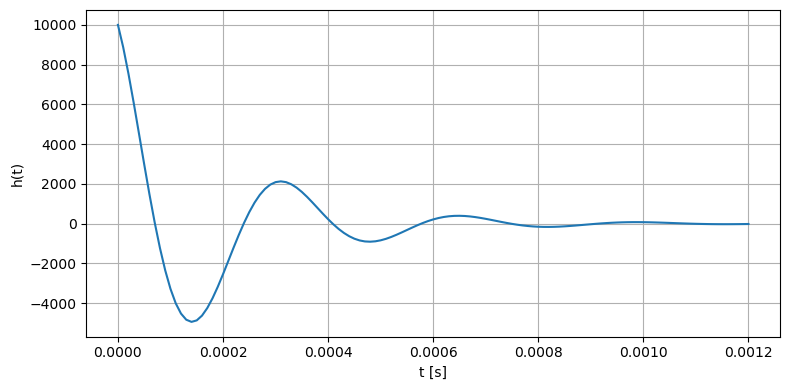

In [190]:
# Insert code calling your sine method function and plotting the impulse response here

R = 1e3
L = 27e-3
C = 100e-9

step = 1e-5
t = np.arange(0, 1.2e-3 + step, step)

y = sine_method(R, L , C, t)

plt.figure(figsize=(8,4))
plt.plot(t, y)
plt.grid()
plt.ylabel("h(t)")
plt.xlabel("t [s]")
plt.title("")
# plt.xticks(np.arange(min(t), max(t) + 1, 1)) #set xtick occurrences
# plt.yticks(np.arange(min(y) - 2, max(y) + 2, 0.1)) #set ytick occurrences
# plt.axis([min(t), max(t), min(y) - 0.1*max(y), max(y) + 0.1*max(y)])
plt.tight_layout()
plt.show()

2. Use the **scipy.signal.impulse()** function to plot the results from $0 \le t \le 1.2$ ms. 

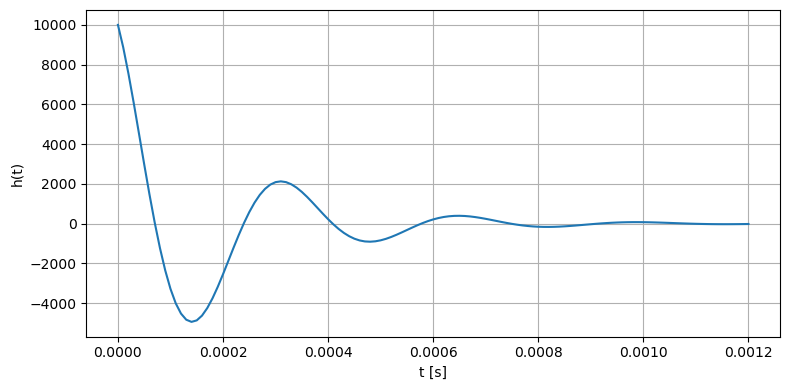

In [191]:
# Insert code using scipy.signal.impulse to find the impulse response here. This will be similar to the example code.
# Also, insert code plotting this response here.

R = 1e3
L = 27e-3
C = 100e-9

top = 1/(R*C)
a = 1
b = 1/(R*C)
c = 1/(L*C)

step = 1e-5
t = np.arange(0, 1.2e-3 + step, step)

num = [top,0]
den = [a,b,c]

tout, yout = sig.impulse((num, den), T = t)

plt.figure(figsize=(8,4))
plt.plot(tout, yout)
plt.grid()
plt.ylabel("h(t)")
plt.xlabel("t [s]")
plt.title("")
# plt.xticks(np.arange(min(t), max(t) + 1, 1)) #set xtick occurrences
# plt.yticks(np.arange(min(y) - 2, max(y) + 2, 0.1)) #set ytick occurrences
# plt.axis([min(t), max(t), min(y) - 0.1*max(y), max(y) + 0.1*max(y)])
plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
This section uses **scipy.signal.step()** function to plot the step response of the transfer function $H(s)$. Additionally, the final value theorem will be demonstrated.   
##### 3.2 Tasks   
1. Find the step response of $H(s)$ using the **scipy.signal.step()** function from $0 \le t \le 1.2$ ms.

In [192]:
# Insert code using scipy.signal.step to find the step response here. 
# Also, insert code plotting this response here.

2. Perform the final value theorem for the step response $H(s)u(s)$ in the Laplace domain.
>$FVT = \lim_{s\to\ 0 } sH(s)u(s) =$

### 5. Questions
1. Explain the result of the Final Value Theorem from **Part 2** **Task 2** in terms of the physical circuit components.  
>Replace this text with your answer, but leave the ">" symbol.  
2. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>Replace this text with your answer, but leave the ">" symbol.